In [2]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import json
import ast

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#symboling-risk associated with the car. Cars are assigned a value between -3 and 3, where a value of -3 represents the highest risk and a value of 3 represents the lowest risk
#normalized losses- relative average loss payment per insured vehicle year. It is an attribute that helps to understand the level of insurance risk of the car.
#stroke-engines with larger stroke tend to have a higher horsepower and torque than engines with smaller stroke
#bore- A larger bore generally means more power, but less fuel efficiency and higher emissions
automobile_df = pd.read_csv('automobile.txt')
automobile_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Data Cleaning 

columns that are redundant or unnecessary are removed. 
duplicate rows are removed

In [4]:
automobile_df=automobile_df.drop(['aspiration','engine-type','length','width','height','engine-location'],axis=1)
automobile_df.drop_duplicates()

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,wheel-base,curb-weight,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,two,convertible,rwd,88.6,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,two,convertible,rwd,88.6,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,two,hatchback,rwd,94.5,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,four,sedan,fwd,99.8,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,four,sedan,4wd,99.4,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,four,sedan,rwd,109.1,2952,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,four,sedan,rwd,109.1,3049,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,four,sedan,rwd,109.1,3012,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,four,sedan,rwd,109.1,3217,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


normalized-losses and stroke columns contain '? implying that their values have not been recorded or some information is missing. These entries are discarded from the dataframe

In [14]:
automobile_df = automobile_df[automobile_df["normalized-losses"] != "?"]
automobile_df = automobile_df[automobile_df["stroke"] != "?"]
automobile_df = automobile_df[automobile_df["num-of-doors"] != "?"]

automobile_df

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,wheel-base,curb-weight,num-of-cylinders,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_range,normalized-losses_range,peak-rpm_range,horsepower_range
3,2,164,audi,gas,four,sedan,fwd,99.8,2337,four,...,10.0,102,5500,24,30,13950,10001-15000,151-200,5001-5500,101-150
4,2,164,audi,gas,four,sedan,4wd,99.4,2824,five,...,8.0,115,5500,18,22,17450,15001-20000,151-200,5001-5500,101-150
6,1,158,audi,gas,four,sedan,fwd,105.8,2844,five,...,8.5,110,5500,19,25,17710,15001-20000,151-200,5001-5500,101-150
8,1,158,audi,gas,four,sedan,fwd,105.8,3086,five,...,8.3,140,5500,17,20,23875,20001-25000,151-200,5001-5500,101-150
10,2,192,bmw,gas,two,sedan,rwd,101.2,2395,four,...,8.8,101,5800,23,29,16430,15001-20000,151-200,5501-6000,101-150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,four,sedan,rwd,109.1,2952,four,...,9.5,114,5400,23,28,16845,15001-20000,50-100,5001-5500,101-150
201,-1,95,volvo,gas,four,sedan,rwd,109.1,3049,four,...,8.7,160,5300,19,25,19045,15001-20000,50-100,5001-5500,151-200
202,-1,95,volvo,gas,four,sedan,rwd,109.1,3012,six,...,8.8,134,5500,18,23,21485,20001-25000,50-100,5001-5500,101-150
203,-1,95,volvo,diesel,four,sedan,rwd,109.1,3217,six,...,23.0,106,4800,26,27,22470,20001-25000,50-100,4501-5000,101-150


some columns that should be integers or floats but are typed as objects

In [6]:
automobile_df['normalized-losses'] = automobile_df['normalized-losses'].astype(np.int64)
automobile_df['price'] = automobile_df['price'].astype(np.int64)
automobile_df['peak-rpm'] = automobile_df['peak-rpm'].astype(np.int64)
automobile_df['horsepower'] = automobile_df['horsepower'].astype(np.int64)
automobile_df['stroke'] = automobile_df['stroke'].astype(np.float64)
print(automobile_df.dtypes)


symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
num-of-doors          object
body-style            object
drive-wheels          object
wheel-base           float64
curb-weight            int64
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


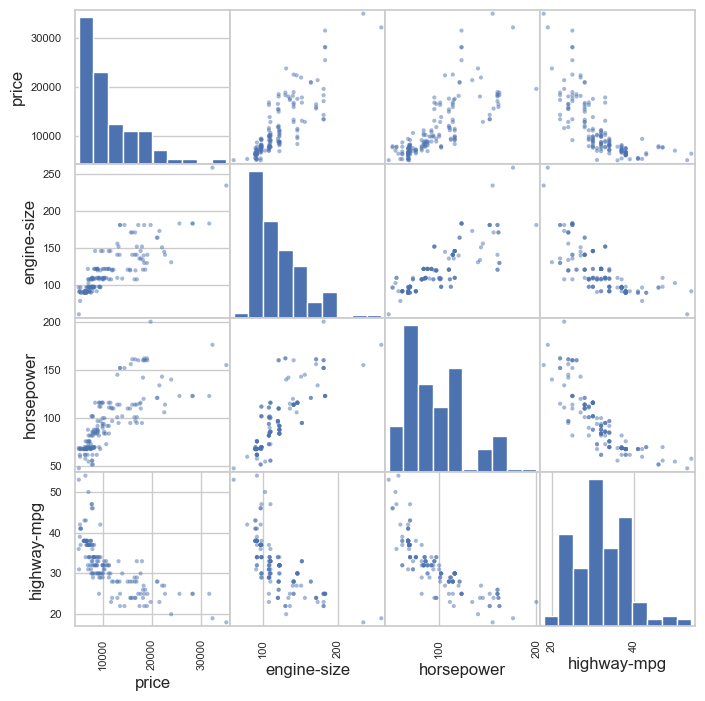

In [7]:
scatter_df=automobile_df[['price','engine-size','horsepower','highway-mpg',]]
pd.plotting.scatter_matrix(scatter_df,figsize=(8,8),grid=True)
plt.show() 

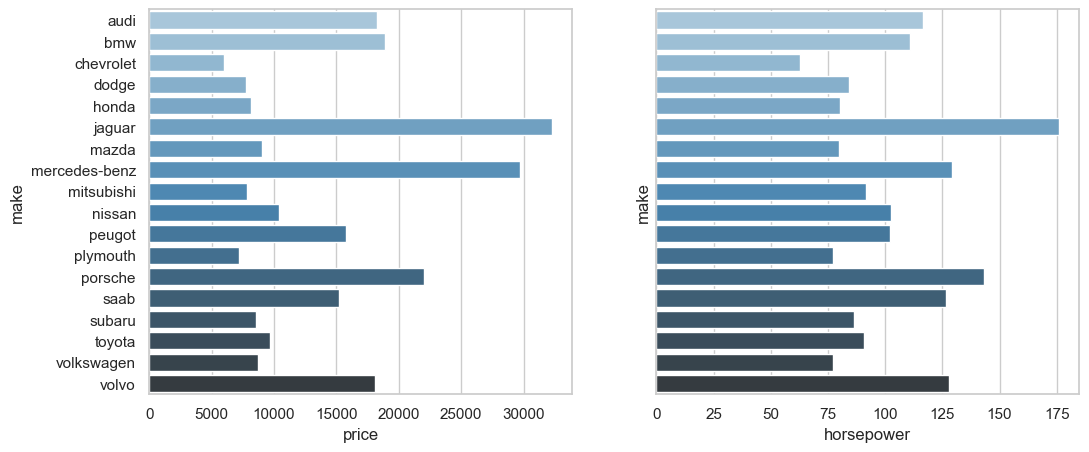

In [8]:
car_type=automobile_df.groupby('make').mean()
fig, ax=plt.subplots(1,2,sharey=True,figsize=(12,5))

sns.barplot(x='price', y=car_type.index, data=car_type,ax=ax[0],palette='Blues_d')
sns.barplot(x='horsepower', y=car_type.index, data=car_type,ax=ax[1],palette='Blues_d')

plt.show()


<AxesSubplot: xlabel='highway-mpg', ylabel='make'>

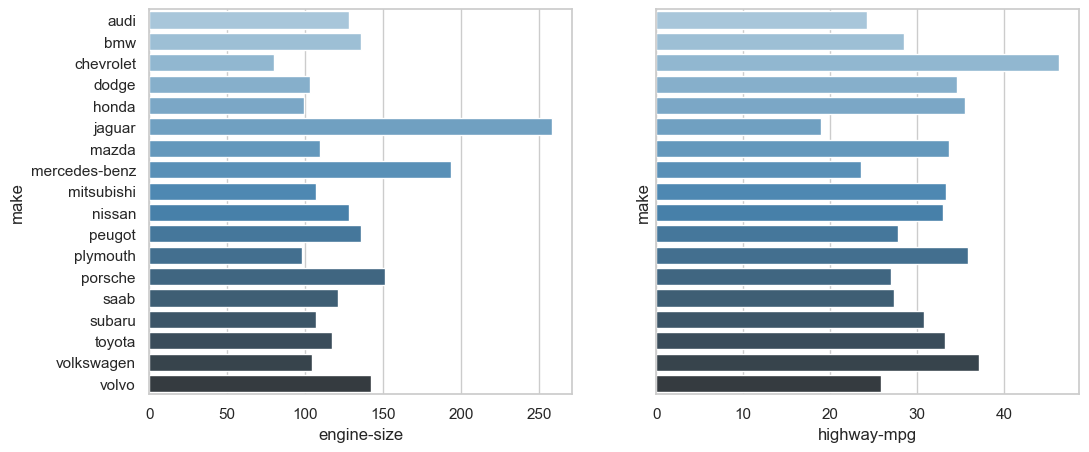

In [9]:
fig, ax=plt.subplots(1,2,sharey=True,figsize=(12,5))

sns.barplot(x='engine-size', y=car_type.index, data=car_type,ax=ax[0],palette='Blues_d')
sns.barplot(x='highway-mpg', y=car_type.index, data=car_type,ax=ax[1],palette='Blues_d')

<AxesSubplot: xlabel='normalized-losses', ylabel='make'>

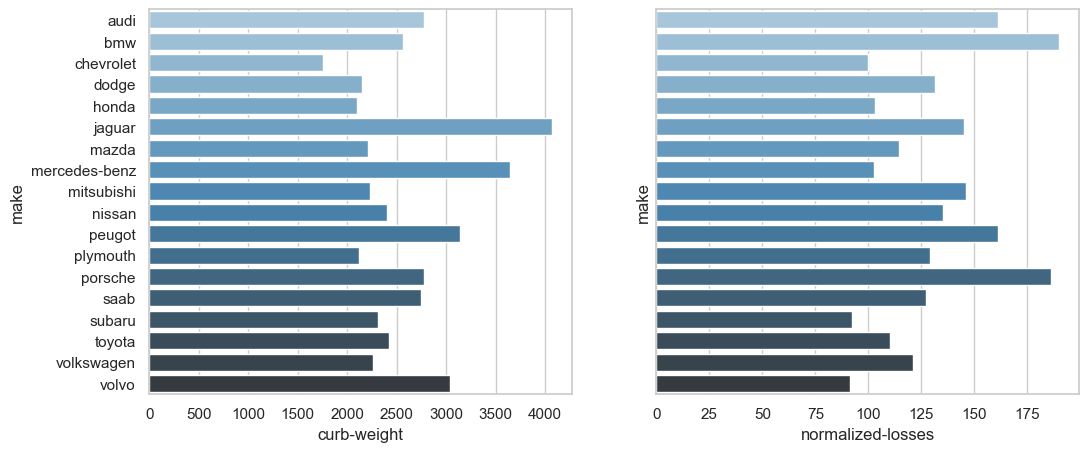

In [10]:
fig, ax=plt.subplots(1,2,sharey=True,figsize=(12,5))

sns.barplot(x='curb-weight', y=car_type.index, data=car_type,ax=ax[0],palette='Blues_d')
sns.barplot(x='normalized-losses', y=car_type.index, data=car_type,ax=ax[1],palette='Blues_d')

Text(0, 0.5, 'Price Range')

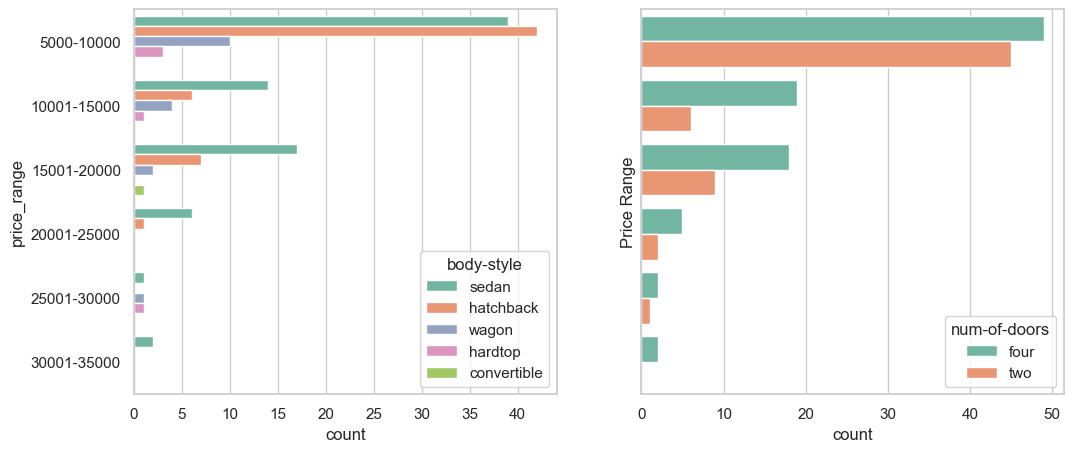

In [11]:
automobile_df["price_range"] = pd.cut(automobile_df['price'], bins=range(5000,40000,5000),labels=['5000-10000','10001-15000','15001-20000','20001-25000','25001-30000','30001-35000'])

fig, ax=plt.subplots(1,2,sharey=True,figsize=(12,5))
sns.countplot(y="price_range", data=automobile_df,hue='body-style',ax=ax[0],palette='Set2')
sns.countplot(y="price_range", data=automobile_df,hue='num-of-doors',ax=ax[1],palette='Set2')
sns.move_legend(obj=ax[0],loc='lower right')
sns.move_legend(obj=ax[1],loc='lower right')


plt.ylabel('Price Range')


Text(0, 0.5, 'Price Range')

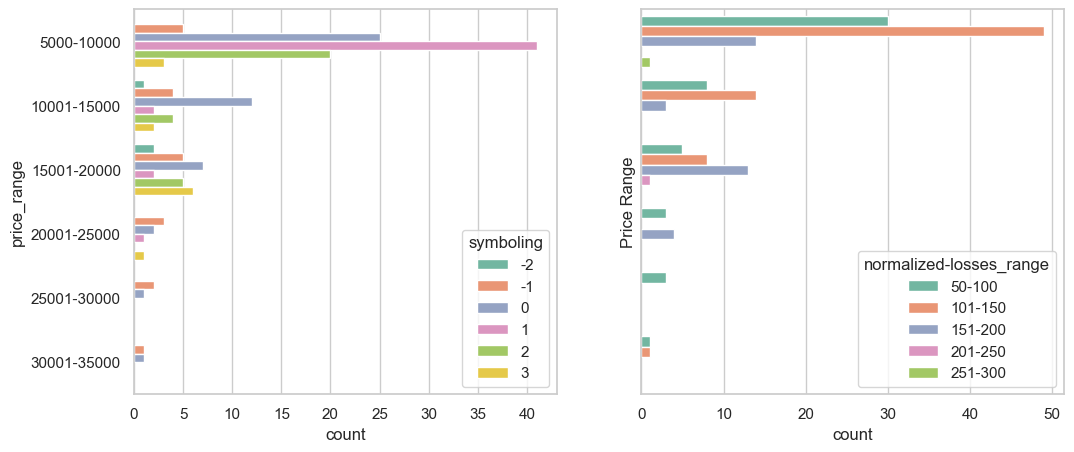

In [12]:
automobile_df["normalized-losses_range"] = pd.cut(automobile_df['normalized-losses'], bins=range(50,301,50),labels=('50-100','101-150','151-200','201-250','251-300'))

fig, ax=plt.subplots(1,2,sharey=True,figsize=(12,5))
sns.countplot(y="price_range", data=automobile_df,hue='symboling',ax=ax[0],palette='Set2')
sns.countplot(y="price_range", data=automobile_df,hue='normalized-losses_range',ax=ax[1],palette='Set2')
sns.move_legend(obj=ax[0],loc='lower right')
sns.move_legend(obj=ax[1],loc='lower right')

plt.ylabel('Price Range')

Text(0, 0.5, 'Price Range')

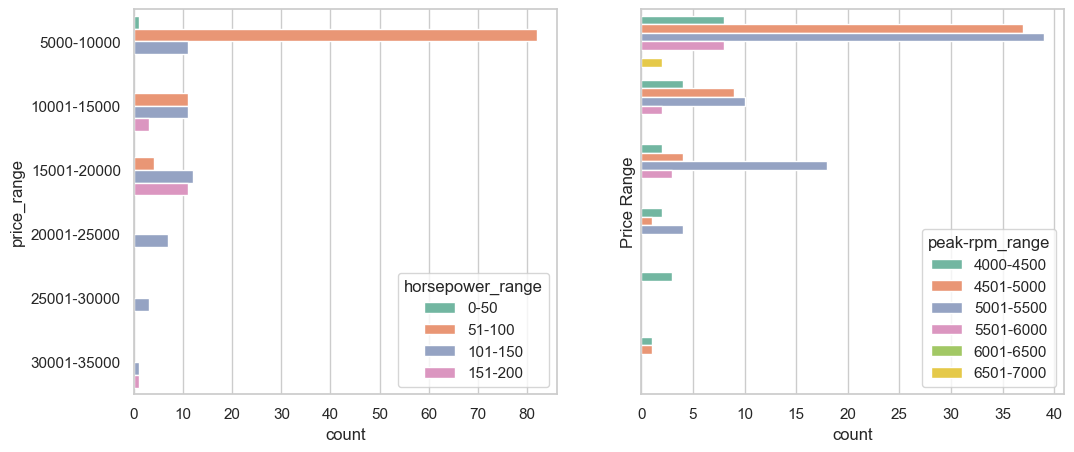

In [13]:
automobile_df["peak-rpm_range"] = pd.cut(automobile_df['peak-rpm'], bins=range(4000,7001,500),labels=('4000-4500','4501-5000','5001-5500','5501-6000','6001-6500','6501-7000'))
automobile_df["horsepower_range"] = pd.cut(automobile_df['horsepower'], bins=range(0,201,50),labels=('0-50','51-100','101-150','151-200',))

fig, ax=plt.subplots(1,2,sharey=True,figsize=(12,5))
sns.countplot(y="price_range", data=automobile_df,hue='horsepower_range',ax=ax[0],palette='Set2')
sns.countplot(y="price_range", data=automobile_df,hue='peak-rpm_range',ax=ax[1],palette='Set2')
sns.move_legend(obj=ax[0],loc='lower right')
sns.move_legend(obj=ax[1],loc='lower right')

plt.ylabel('Price Range')
